In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("./marketing_data_1.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,03-07-2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12-03-2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

<Axes: >

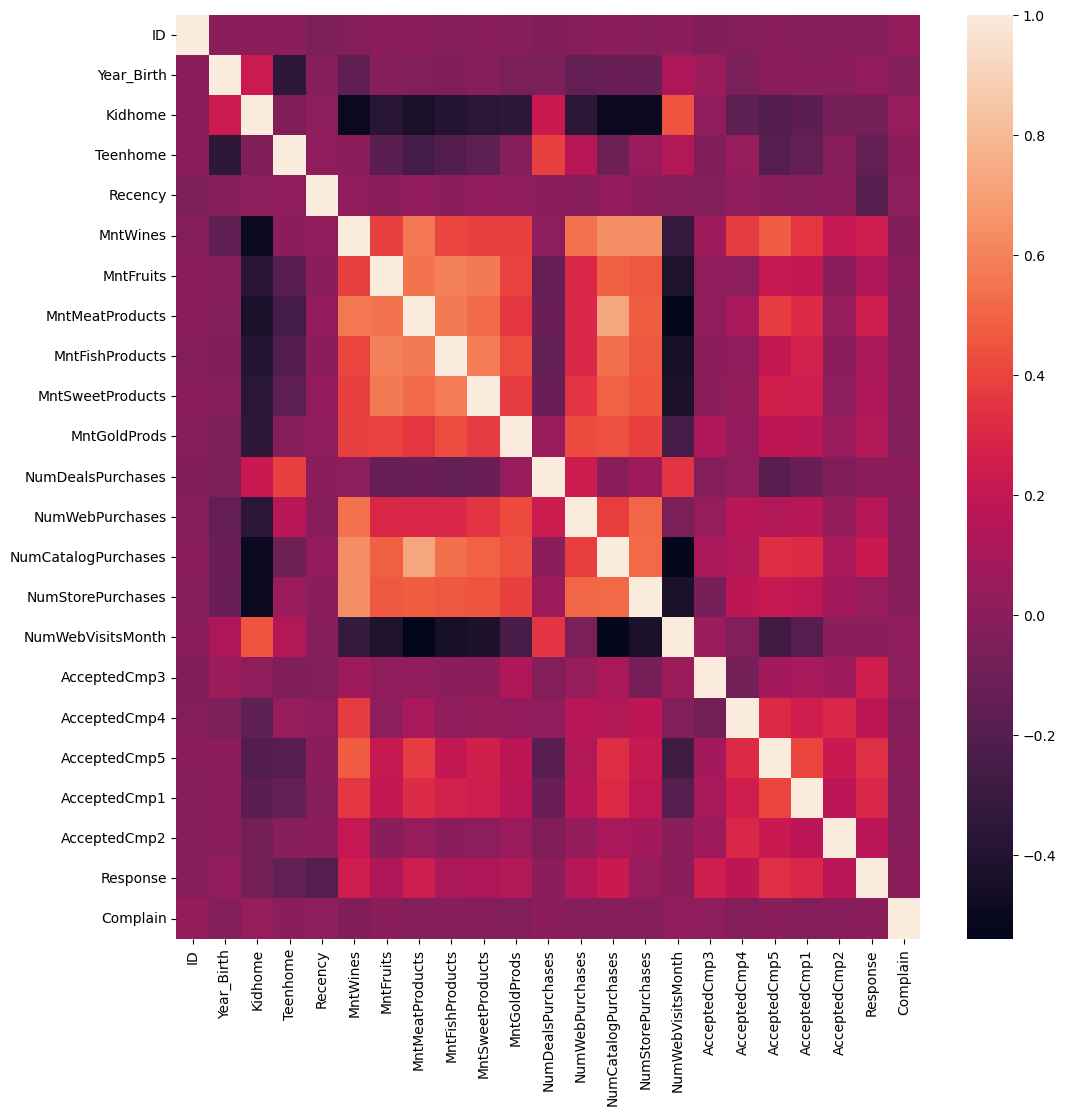

In [4]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [5]:
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,03-07-2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12-03-2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')


In [7]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [33]:
object_columns = df.select_dtypes(include=['object'])
object_columns

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP
...,...,...,...
2235,PhD,Divorced,US
2236,2n Cycle,Married,SP
2237,Graduation,Divorced,SP
2238,Graduation,Married,IND


In [34]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [37]:
oe=OrdinalEncoder()
df['Education']=oe.fit_transform(df[['Education']])
df['Marital_Status']=oe.fit_transform(df[['Marital_Status']])
df['Country']=oe.fit_transform(df[['Country']])

In [6]:
df['Income']=pd.to_numeric(df['Income'])

In [10]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [11]:
df['Income'].fillna(df['Income'].mean(), inplace=True)


In [12]:
X = df.drop(['MntWines'], axis=1)
y = df['MntWines']

In [13]:
x=pd.get_dummies(X)
x

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Dt_Customer_9/30/12,Dt_Customer_9/30/13,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,84835.0,0,0,0,104,379,111,189,...,0,0,0,0,0,0,0,0,1,0
1,1,1961,57091.0,0,0,0,5,64,7,0,...,0,0,0,1,0,0,0,0,0,0
2,10476,1958,67267.0,0,1,0,11,59,15,2,...,0,0,0,0,0,0,0,0,0,1
3,1386,1967,32474.0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5371,1989,21474.0,1,0,0,16,24,11,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,99,18,126,47,48,...,0,0,0,0,0,0,0,0,0,1
2236,5263,1977,31056.0,1,0,99,10,13,3,8,...,0,0,0,0,0,0,0,0,1,0
2237,22,1976,46310.0,1,0,99,2,88,15,5,...,0,0,0,0,0,0,0,0,1,0
2238,528,1978,65819.0,0,0,99,38,701,149,165,...,0,0,0,0,0,1,0,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
pca = PCA(n_components=0.95)  # You can choose the desired explained variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [17]:
reg_model = LinearRegression()
reg_model.fit(X_train_pca, y_train)

LinearRegression()

In [18]:
reg_pred=reg_model.predict(X_test_pca)

In [19]:
r2_score(reg_pred, y_test)

0.32124569190288255

In [20]:
mean_absolute_error(reg_pred, y_test)

162.5766767963542

In [21]:
mean_squared_error(reg_pred, y_test)

55135.13691404008

In [22]:
rf=RandomForestRegressor()
rf.fit(X_train_pca, y_train)

RandomForestRegressor()

In [23]:
rf_pred=rf.predict(X_test_pca)

In [28]:
r2_score(rf_pred, y_test)

0.4492540762794007

In [29]:
mean_absolute_error(rf_pred, y_test)

125.3497767857143

In [30]:
mean_squared_error(rf_pred, y_test)

39768.060193749996

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train_pca, y_train)

DecisionTreeRegressor()

In [32]:
dt_pred=dt.predict(X_test_pca)

In [33]:
r2_score(dt_pred, y_test)

0.3083167265931074

In [34]:
mean_absolute_error(dt_pred, y_test)

167.30580357142858

In [35]:
from sklearn.model_selection import GridSearchCV

In [26]:
lr=LinearRegression()
lr_params={'fit_intercept':[True,False],'copy_X':[True,False],'n_jobs':[1,10,100,1000],'positive':[True,False]}
grid_lr=GridSearchCV(lr,param_grid=lr_params)
grid_lr.fit(X_train_pca,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 10, 100, 1000],
                         'positive': [True, False]})

In [27]:
grid_lr_pred=grid_lr.predict(X_test_pcaca)

In [28]:
grid_lr.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [29]:
r2_score(grid_lr_pred, y_test)

0.13592634388982316

In [30]:
grid_lr.best_score_

0.124881733735918

In [33]:
rfr=RandomForestRegressor()
rfr_params={'n_estimators':[100],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'verbose':[1]}
grid_rfr=GridSearchCV(rfr,param_grid=rfr_params)
grid_rfr.fit(X_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   56.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   57.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   59.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

KeyboardInterrupt: 